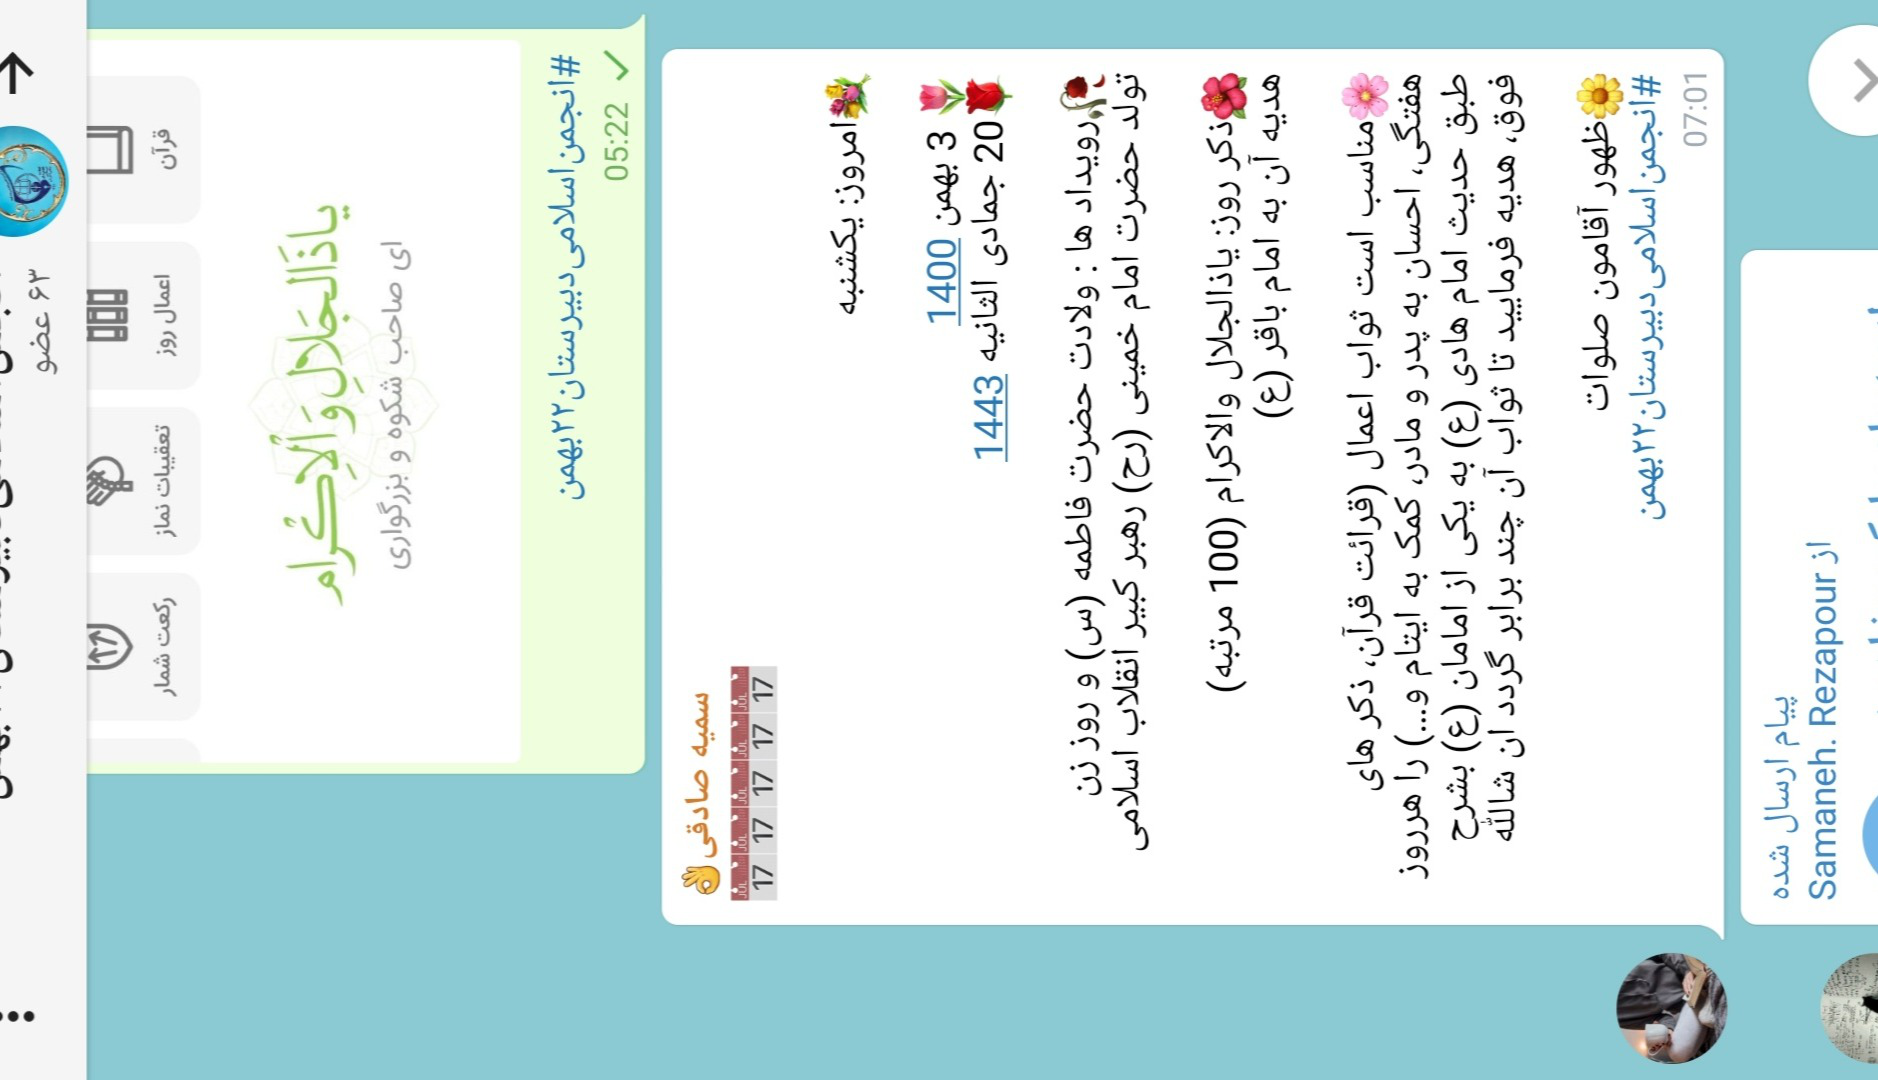

In [2]:
import numpy as np
import tensorflow as tf
import sys
np.random.seed(30)
tf.random.set_seed(30)

from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input
from tensorflow.keras.preprocessing import image
sys.path.append("C:/Users/h.ghanipur/Desktop/هوش مصنوعی تفکیک اسکرین شات/Chat Detection/train/chat")
#img = image.load_img("chat (255).jpeg")
img = image.load_img(r"C:\Users\h.ghanipur\Desktop\هوش مصنوعی تفکیک اسکرین شات\Chat Detection\train\chat\chat (255).jpeg")
display(img)

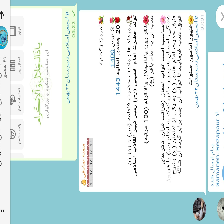

In [3]:
img = image.load_img(r"C:\Users\h.ghanipur\Desktop\هوش مصنوعی تفکیک اسکرین شات\Chat Detection\train\chat\chat (255).jpeg", target_size=(224, 224))
display(img)

In [4]:
from numpy.lib.function_base import append
from keras.applications.vgg16 import preprocess_input
screenshot_no=[]
screenshot_yes=[]
target=[]
%cd "C:/Users/h.ghanipur/Desktop/هوش مصنوعی تفکیک اسکرین شات/Chat Detection/train/chat/"
for i in range(0,765):
  img = image.load_img("chat ("+str(i+1)+").jpeg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  screenshot_yes.append(img)
  target.append(1)

%cd "C:/Users/h.ghanipur/Desktop/هوش مصنوعی تفکیک اسکرین شات/Chat Detection/train/ordinary/"
for i in range(0,638):
  img = image.load_img("ordinary ("+str(i+1)+").jpeg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  screenshot_no.append(img)
  target.append(0)
All_data=[]
All_data=screenshot_yes+screenshot_no
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(screenshot_yes))
print(len(screenshot_no))
All_data1=np.array(All_data)
print(len(All_data))
target1=np.array(target)

C:\Users\h.ghanipur\Desktop\هوش مصنوعی تفکیک اسکرین شات\Chat Detection\train\chat
C:\Users\h.ghanipur\Desktop\هوش مصنوعی تفکیک اسکرین شات\Chat Detection\train\ordinary
765
638
1403


1


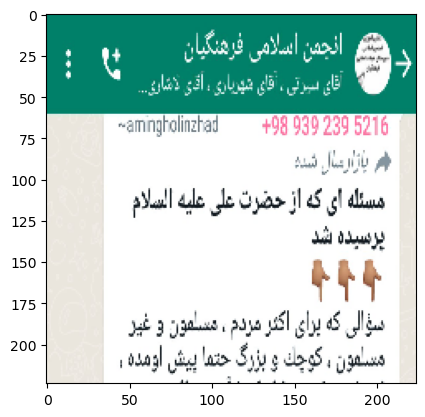

In [15]:
import matplotlib.pyplot as plt
import random
rand=random.randint(0,1403)
plt.imshow(All_data1[rand])
print(target1[rand])

In [16]:
from sklearn.utils import shuffle
All_data1, target1 = shuffle(All_data1, target1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(All_data1, target1, test_size=0.33)

In [17]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
import tensorflow as tf
keras.backend.clear_session()
ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_ResNet_modelVGG = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
# modelVGG.layers.pop()
modelVGG.trainable=False
model = Sequential()
model.add (modelVGG)
model.add (keras.layers.Flatten())
# keras.layers.Dropout(rate=0.1)

model.add (keras.layers.Dense(2,activation='relu'))
model.add (keras.layers.Dense(5, activation='relu'))
model.add (keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14764887 (56.32 MB)
Trainable params: 50199 (196.09 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
None


In [35]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [18]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentOne.h5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)
history=model.fit(x=X_train, y=y_train, epochs=2,batch_size=64,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])


Epoch 1/2
15/15 [==============================] - 269s 18s/step - loss: 0.3319 - accuracy: 0.8713 - val_loss: 0.3563 - val_accuracy: 0.8920
Epoch 2/2


c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 278s 19s/step - loss: 0.1817 - accuracy: 0.9245 - val_loss: 0.3150 - val_accuracy: 0.8942


In [20]:
%cd "C:/Users/h.ghanipur/Desktop/vgg"
save=model.save('vgg_my_model2.keras',save_format='keras')

C:\Users\h.ghanipur\Desktop\vgg


In [18]:
import os

# Define the filepath in Drive D:
checkpoint_filepath = "D:/presentOne.h5"

# Ensure that the directory exists or create it if it doesn't
os.makedirs(os.path.dirname(checkpoint_filepath), exist_ok=True)

# Define the ModelCheckpoint callback with the updated filepath
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [32]:
import pickle
from keras.models import load_model

# Assuming you have a trained Keras model named 'model'
# Save the model as a pickle file
with open('vgg_my_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [39]:
from tensorflow.keras.models import load_model
# Load the model from the .h5 file
%cd "C:/Users/h.ghanipur/Desktop/vgg"
model = load_model('vgg_my_model.h5')




C:\Users\h.ghanipur\Desktop\vgg


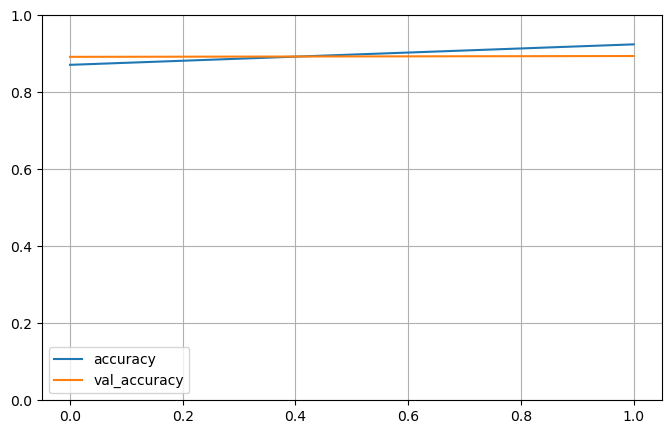

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame ( history.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentOne.png', dpi=300)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
temp = load_model ('vgg_my_model2.h5')
print('acc: ', temp.evaluate(X_test,y_test))

predictions = temp.predict_generator(X_test, steps=len(X_test))

15/15 [==============================] - 94s 6s/step - loss: 0.3150 - accuracy: 0.8942
acc:  [0.31502389907836914, 0.894168496131897]


C:\Users\h.ghanipur\AppData\Local\Temp\ipykernel_9052\3782251002.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = temp.predict_generator(X_test, steps=len(X_test))


In [24]:
print('scores: ')
def rounder(a):
    k=[]
    for t in range(0,len(a)):
       a[t][0]=round(a[t][0])
    return np.array(a)
y=rounder(predictions)

report = classification_report (y_true= y_test, y_pred=y.reshape(463))
print(report)

scores: 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       219
           1       0.85      0.97      0.91       244

    accuracy                           0.89       463
   macro avg       0.90      0.89      0.89       463
weighted avg       0.90      0.89      0.89       463



ResNet

In [26]:
import numpy as np
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the ResNet50 model pretrained on ImageNet, excluding the top classification layer
ResNet50_model = ResNet50(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = ResNet50_model.output
# x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with 256 hidden units and ReLU activation
# x = Dense(256, activation='relu')(x)

# Add a logistic layer with 10 classes
# predictions = Dense(10, activation='softmax')(x)

# Combine the base model and the fully connected layers
model = Model(inputs=ResNet50_model.input, outputs=predictions)

# Freeze the layers in the base ResNet50 model
for layer in ResNet50_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/2


ValueError: in user code:

    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\h.ghanipur\Anaconda3\envs\Image processing\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


MobileNet